# MACHINE LEARNING ALGORITHMS TEST
# -- REGRESSION --

## 0. Starting up

### 0.1. Import Libraries

In [1]:
import pandas                          as pd
import numpy                           as np
from matplotlib import pyplot          as plt
from graphviz   import Source

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn              import metrics          as mt

# Decision Tree
from sklearn    import tree            as tr
from sklearn    import ensemble        as en

# Polinomial Regression
from sklearn    import preprocessing   as pp
#from sklearn    import datasets        as dt
#from sklearn    import model_selection as ms
from sklearn    import linear_model    as lm


### 0.2. Load Dataset

In [2]:
MyCSV = 'http://menezes.mendonca.nom.br/datasets/FML/FML_Regressao_X_training.csv'
df_X_train = pd.read_csv( MyCSV )

MyCSV = 'http://menezes.mendonca.nom.br/datasets/FML/FML_Regressao_X_validation.csv'
df_X_val = pd.read_csv( MyCSV )

MyCSV = 'http://menezes.mendonca.nom.br/datasets/FML/FML_Regressao_X_test.csv'
df_X_test = pd.read_csv( MyCSV )

MyCSV = 'http://menezes.mendonca.nom.br/datasets/FML/FML_Regressao_y_training.csv'
df_y_train = pd.read_csv( MyCSV )

MyCSV = 'http://menezes.mendonca.nom.br/datasets/FML/FML_Regressao_y_val.csv'
df_y_val = pd.read_csv( MyCSV )

MyCSV = 'http://menezes.mendonca.nom.br/datasets/FML/FML_Regressao_y_test.csv'
df_y_test = pd.read_csv( MyCSV )

In [ ]:
#                   X DATASET STRUCTURE:
# song_duration_ms (float) . . . . . . . md= 0.0000  dp=1.0000  max=19.6910  min=-3.5538
# acousticness    (float)                md= 0.2595  dp=0.2902  max= 0.9960  min= 0.0000
# danceability    (float)  . . . . . . . md= 0.6340  dp=0.1562  max= 0.9870  min= 0.0000
# energy          (float)                md= 0.6454  dp=0.2143  max= 0.9990  min= 0.0011
# instrumentalness (float) . . . . . . . md= 0.0791  dp=0.2228  max= 0.9890  min= 0.0000
# key             (float)                md= 0.4832  dp=0.3272  max= 1.0000  min= 0.0000
# liveness        (float)  . . . . . . . md= 0.1804  dp=0.1447  max= 0.9840  min= 0.0157
# loudness        (float)                md= 0.0000  dp=1.0000  max= 2.2929  min=-7.6323
# audio_mode      (int)    . . . . . . . binary [ 0, 1 ]
# speechiness     (float)                md= 0.1009  dp=0.1033  max= 0.9410  min=0.0000
# tempo           (float)  . . . . . . . md=-0.0000  dp=1.0000  max= 4.2267  min=-4.2200
# time_signature  (float)                md= 0.7916  dp=0.0608  max= 1.0000  min=0.0000
# audio_valence   (float)  . . . . . . . md= 0.5299  dp=0.2444  max= 0.9820  min=0.0000


#                   Y DATASET STRUCTURE:
# song_popularity (float)  . . . . . . . md=53.0470  dp=21.8635  max=100.0000  min=0.1000
#

### 0.3. Data Structure Investigation

In [3]:
df_X_train.head(3)

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.205673,0.0921,0.720,0.802,0.000000,0.090909,0.694,0.431778,1,0.0582,0.103876,0.8,0.723
1,-0.240409,0.7370,0.483,0.412,0.000000,0.636364,0.116,-0.262732,1,0.0402,1.711532,0.6,0.247
2,-0.125770,0.2740,0.671,0.565,0.000065,1.000000,0.370,0.013612,0,0.1600,1.009176,0.8,0.561


In [4]:
df_y_train.head(3)

,song_popularity
0,79.0
1,86.0
2,63.0


In [5]:
df_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10547 entries, 0 to 10546
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_duration_ms  10547 non-null  float64
 1   acousticness      10547 non-null  float64
 2   danceability      10547 non-null  float64
 3   energy            10547 non-null  float64
 4   instrumentalness  10547 non-null  float64
 5   key               10547 non-null  float64
 6   liveness          10547 non-null  float64
 7   loudness          10547 non-null  float64
 8   audio_mode        10547 non-null  int64  
 9   speechiness       10547 non-null  float64
 10  tempo             10547 non-null  float64
 11  time_signature    10547 non-null  float64
 12  audio_valence     10547 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [6]:
df_y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10547 entries, 0 to 10546
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   song_popularity  10547 non-null  float64
dtypes: float64(1)
memory usage: 82.5 KB


In [7]:
for nome in df_X_train.columns.tolist():
    md = np.mean(df_X_train.loc[:,nome])
    sd = np.std(df_X_train.loc[:,nome])
    mx = np.max(df_X_train.loc[:,nome])
    mn = np.min(df_X_train.loc[:,nome])
    print( "{:<16} . . . : md={:.4f}  dp={:.4f}  max={:.4f}  min={:.4f}".format( nome, md, sd, mx, mn ) )

song_duration_ms . . . : md=0.0000  dp=1.0000  max=19.6910  min=-3.5538
acousticness     . . . : md=0.2595  dp=0.2902  max=0.9960  min=0.0000
danceability     . . . : md=0.6340  dp=0.1562  max=0.9870  min=0.0000
energy           . . . : md=0.6454  dp=0.2143  max=0.9990  min=0.0011
instrumentalness . . . : md=0.0791  dp=0.2228  max=0.9890  min=0.0000
key              . . . : md=0.4832  dp=0.3272  max=1.0000  min=0.0000
liveness         . . . : md=0.1804  dp=0.1447  max=0.9840  min=0.0157
loudness         . . . : md=0.0000  dp=1.0000  max=2.2929  min=-7.6323
audio_mode       . . . : md=0.6271  dp=0.4836  max=1.0000  min=0.0000
speechiness      . . . : md=0.1009  dp=0.1033  max=0.9410  min=0.0000
tempo            . . . : md=-0.0000  dp=1.0000  max=4.2267  min=-4.2200
time_signature   . . . : md=0.7916  dp=0.0608  max=1.0000  min=0.0000
audio_valence    . . . : md=0.5299  dp=0.2444  max=0.9820  min=0.0000


In [8]:
for nome in df_y_train.columns.tolist():
    md = np.mean(df_y_train.loc[:,nome])
    sd = np.std(df_y_train.loc[:,nome])
    mx = np.max(df_y_train.loc[:,nome])
    mn = np.min(df_y_train.loc[:,nome])
    print( "{:<16} . . . : md={:.4f}  dp={:.4f}  max={:.4f}  min={:.4f}".format( nome, md, sd, mx, mn ) )

song_popularity  . . . : md=53.0470  dp=21.8635  max=100.0000  min=0.1000


In [ ]:
#                   X DATASET STRUCTURE:
# song_duration_ms (float) . . . . . . . md= 0.0000  dp=1.0000  max=19.6910  min=-3.5538
# acousticness    (float)                md= 0.2595  dp=0.2902  max= 0.9960  min= 0.0000
# danceability    (float)  . . . . . . . md= 0.6340  dp=0.1562  max= 0.9870  min= 0.0000
# energy          (float)                md= 0.6454  dp=0.2143  max= 0.9990  min= 0.0011
# instrumentalness (float) . . . . . . . md= 0.0791  dp=0.2228  max= 0.9890  min= 0.0000
# key             (float)                md= 0.4832  dp=0.3272  max= 1.0000  min= 0.0000
# liveness        (float)  . . . . . . . md= 0.1804  dp=0.1447  max= 0.9840  min= 0.0157
# loudness        (float)                md= 0.0000  dp=1.0000  max= 2.2929  min=-7.6323
# audio_mode      (int)    . . . . . . . binary [ 0, 1 ]
# speechiness     (float)                md= 0.1009  dp=0.1033  max= 0.9410  min=0.0000
# tempo           (float)  . . . . . . . md=-0.0000  dp=1.0000  max= 4.2267  min=-4.2200
# time_signature  (float)                md= 0.7916  dp=0.0608  max= 1.0000  min=0.0000
# audio_valence   (float)  . . . . . . . md= 0.5299  dp=0.2444  max= 0.9820  min=0.0000


#                   Y DATASET STRUCTURE:
# song_popularity (float)  . . . . . . . md=53.0470  dp=21.8635  max=100.0000  min=0.1000
#

### 0.4. Data Structure Plotting

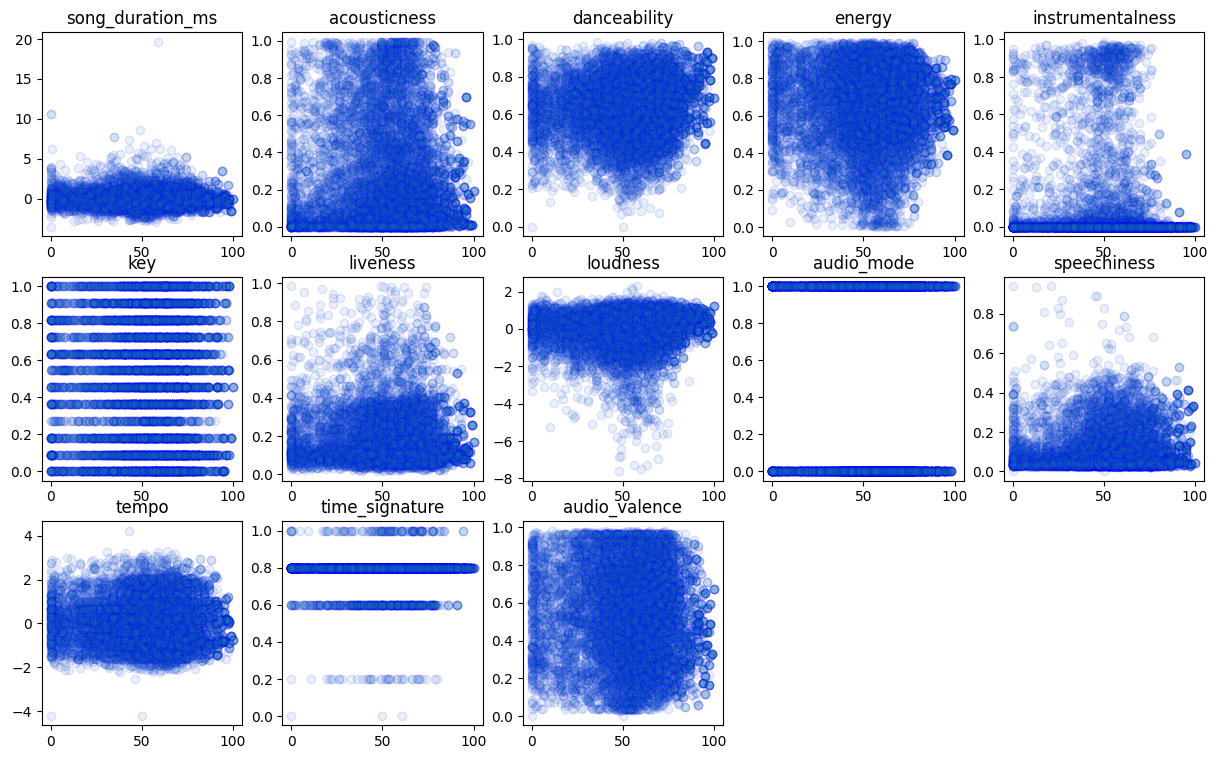

In [9]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
#

plt.figure( figsize=(15, 9) )
name = df_X_train.columns.tolist()
for p in range( len( name ) ):
    plt.subplot( 3, 5, p+1 )
    plt.scatter( df_y_train, df_X_train.loc[:, name[p] ], alpha=0.1, edgecolors='b' )
    plt.title( name[p] )


### 0.5. My Functions

In [10]:
def ShowMyPerformance( vector_y: np.ndarray, vector_yhat: np.ndarray, silent=False) -> list:
    # Performance
    R2 = mt.r2_score( vector_y, vector_yhat )
    mse = mt.mean_squared_error( vector_y, vector_yhat )
    rmse = np.sqrt( mse )
    # Mean Absolute Error = avg( abs( y - yhat ) )
    TheError  = np.subtract( vector_y, vector_yhat )
    MAE = np.mean( np.abs( TheError ) )
    # Mean Absolute Percent Error = avg( abs( (y-yhat)/y ) )
    TheErrorP = np.divide( TheError, vector_y )
    MAPE = np.mean( np.abs( TheErrorP ) )

    # Show me the numbers
    if not silent:
        print( "REGRESSION PERFORMANCE: R2={:.6f}  MSE={:.6f}  RMSE={:.6f}  MAE={:.6f}  MAPE={:.6f}"
               .format(R2, mse, rmse, MAE, MAPE) )

    return [ R2, mse, rmse, MAE, MAPE ]


## 1. Algorithm: LINEAR REGRESSION

See Aurélien Geron ed.3, pg.132-138.
- Closed-form Solution: the model has a mathematical equation that gives the result directly.

### 1.1. Features Selection

In [ ]:
# FEATURES: no feature will be excluded, which means: features = df_X_train
# LABEL = df_y_train

In [11]:
df_X_train.head(3)

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.205673,0.0921,0.720,0.802,0.000000,0.090909,0.694,0.431778,1,0.0582,0.103876,0.8,0.723
1,-0.240409,0.7370,0.483,0.412,0.000000,0.636364,0.116,-0.262732,1,0.0402,1.711532,0.6,0.247
2,-0.125770,0.2740,0.671,0.565,0.000065,1.000000,0.370,0.013612,0,0.1600,1.009176,0.8,0.561


### 1.2. Model-Fit-Predict

In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# (1) SKLEARN LIBRARY
# Model definition
model1_lr = LinearRegression()

# Model fit
model1_lr.fit( df_X_train, df_y_train )

# Prediction
y_pred = model1_lr.predict( df_X_train )

# Parameters
#print( model1_lr.intercept_ )
model1_lr.coef_

# Performance
ShowMyPerformance( df_y_train.to_numpy(), y_pred )



REGRESSION PERFORMANCE: R2=0.046058  MSE=455.996112  RMSE=21.354065  MAE=16.998249  MAPE=8.653186


[0.04605830473391903,
 455.99611182562677,
 21.35406546364478,
 16.998249066011095,
 8.653185943804512]

In [13]:
# VALIDATION SET

y_val_pred = model1_lr.predict( df_X_val )

# Performance
ShowMyPerformance( df_y_val.to_numpy(), y_val_pred )

REGRESSION PERFORMANCE: R2=0.039925  MSE=458.447042  RMSE=21.411376  MAE=17.039754  MAPE=8.682542


[0.03992483038154071,
 458.4470418439312,
 21.41137645841414,
 17.039753759960327,
 8.682541883735295]

In [14]:
# TEST SET

y_test_pred = model1_lr.predict( df_X_test )

# Performance
ShowMyPerformance( df_y_test.to_numpy(), y_test_pred )

REGRESSION PERFORMANCE: R2=0.052317  MSE=461.427719  RMSE=21.480869  MAE=17.129965  MAPE=8.521859


[0.052317119521687494,
 461.42771933638954,
 21.480868682071254,
 17.12996509166612,
 8.521859277849835]

## 2. Algorithm: DECISION TREE REGRESSOR

### 2.1. Features Selection

In [ ]:
# FEATURES: no feature will be excluded, which means: features = df_X_train
# LABEL = df_y_train

### 2.2. Optimization & Holdout Validation

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
#
# ------------------------
# Parameters to search for
# ------------------------
#
# max_depth
# min_impurity_decrease
# max_features [None, 1, 2, 3...]
# ccp_alpha [0,0 .. 0,5 .. 1,0 ]

# Parameters to be optimized:
# max_depth
ParA = [None] + list( range(  2,  31, 1 ) )
ParA = [ 24 ]
# min_impurity_decrease
ParB = list( np.arange( 0.0, 3.0, 0.1 ) )
ParB = [ 0.1 ]
# max_features
ParC = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ]
ParC = [ 8 ]
# ccp_alpha
ParD = list( np.arange( 0.0, 1.0, 0.1 ) )
ParD = [ 0.4 ]

# Best values
best_indicator = [ 0, 0, 0, 0, 0 ]
best_tree_model = None

FirstTime = True
for ii in range(len(ParA)):
    i = len(ParA) -ii -1
    print( "--->> max_depth={}".format(ParA[i]) )
    for j in range(len(ParB)):
        for k in range(len(ParC)):
            for l in range(len(ParD)):
                # parameters used
                parameters = [ ParA[i], ParB[j], ParC[k], ParD[l] ]
                # definition
                model = tr.DecisionTreeRegressor( 
                    max_depth=ParA[i],
                    min_impurity_decrease=ParB[j],
                    max_features=ParC[k],
                    ccp_alpha=ParD[l],
                    random_state=42 
                )
                # training
                model.fit( df_X_train, df_y_train )

                # performance
                yhat_val = model.predict( df_X_val )
                indicator = ShowMyPerformance( df_y_val.to_numpy(), yhat_val, True )

                # Is this a best case?
                if FirstTime or indicator[1] < best_indicator[1]:
                    FirstTime = False
                    best_indicator = indicator
                    best_tree_model = model
                    best_parameters = parameters
                    print("--->> max_depth={}  impurity={}  nFeat={}  alpha={}"
                          .format(ParA[i], ParB[j], ParC[k], ParD[l]))
                    ShowMyPerformance( df_y_val.to_numpy(), yhat_val )

# Show best result:
print("")
print("----- FINAL RESULTS -----")
print("Performance: R2={}  MSE={}  RMSE={}  MAE={}  MAPE={}"
      .format(best_indicator[0], best_indicator[1], best_indicator[2], best_indicator[3], best_indicator[4],))
print("Parameters: max_depth={}  impurity={}  nFeat={}  alpha={}"
      .format(best_parameters[0], best_parameters[1], best_parameters[2], best_parameters[3]))


# DecisionTreeRegressor(ccp_alpha=0.4, max_depth=24, max_features=8,
#                       min_impurity_decrease=0.1, random_state=42)
# --->> max_depth=24  impurity=0.1  nFeat=8  alpha=0.4
# REGRESSION PERFORMANCE: R2=0.107555  MSE=426.152612  RMSE=20.643464  MAE=19.517227  MAPE=8.741685


--->> max_depth=24
--->> max_depth=24  impurity=0.1  nFeat=8  alpha=0.4
REGRESSION PERFORMANCE: R2=0.107555  MSE=426.152612  RMSE=20.643464  MAE=19.517227  MAPE=8.741685

----- FINAL RESULTS -----
Performance: R2=0.10755549921853813  MSE=426.15261214987953  RMSE=20.643464150909352  MAE=19.517226952745773  MAPE=8.741685197786857
Parameters: max_depth=24  impurity=0.1  nFeat=8  alpha=0.4


In [16]:
best_tree_model

DecisionTreeRegressor(ccp_alpha=0.4, max_depth=24, max_features=8,
                      min_impurity_decrease=0.1, random_state=42)

### 2.3. FIT Again for X_TRAIN + X_VAL

In [ ]:
# DecisionTreeRegressor(ccp_alpha=0.4, max_depth=24, max_features=8,
#                       min_impurity_decrease=0.1, random_state=42)
# --->> max_depth=24  impurity=0.1  nFeat=8  alpha=0.4
# REGRESSION PERFORMANCE: R2=0.107555  MSE=426.152612  RMSE=20.643464  MAE=19.517227  MAPE=8.741685

In [17]:
# Model Definition:
best_tree_model = tr.DecisionTreeRegressor( 
    max_depth=24,
    min_impurity_decrease=0.1,
    max_features=8,
    ccp_alpha=0.4,
    random_state=42 
)

# Training Random-Forest:
best_tree_model.fit(
    np.concatenate( (df_X_train, df_X_val) ),
    np.concatenate( (df_y_train, df_y_val) ) 
)

DecisionTreeRegressor(ccp_alpha=0.4, max_depth=24, max_features=8,
                      min_impurity_decrease=0.1, random_state=42)

### 2.4. Final Performance (TVT)

##### 2.4.1. X_Train

In [18]:
yhat_train = best_tree_model.predict( df_X_train )
indicator = ShowMyPerformance( df_y_train.to_numpy(), yhat_train )

c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


REGRESSION PERFORMANCE: R2=0.200919  MSE=381.970548  RMSE=19.544067  MAE=19.046823  MAPE=8.773897


##### 2.4.2. X_Val

In [19]:
yhat_val = best_tree_model.predict( df_X_val )
indicator = ShowMyPerformance( df_y_val.to_numpy(), yhat_val )

c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


REGRESSION PERFORMANCE: R2=0.188801  MSE=387.356867  RMSE=19.681384  MAE=18.989914  MAPE=8.702693


##### 2.4.3. X_Test

In [20]:
yhat_test = best_tree_model.predict( df_X_test )
indicator = ShowMyPerformance( df_y_test.to_numpy(), yhat_test )

REGRESSION PERFORMANCE: R2=0.100054  MSE=438.184815  RMSE=20.932864  MAE=19.171883  MAPE=8.752224


c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


### 2.5. Plotting

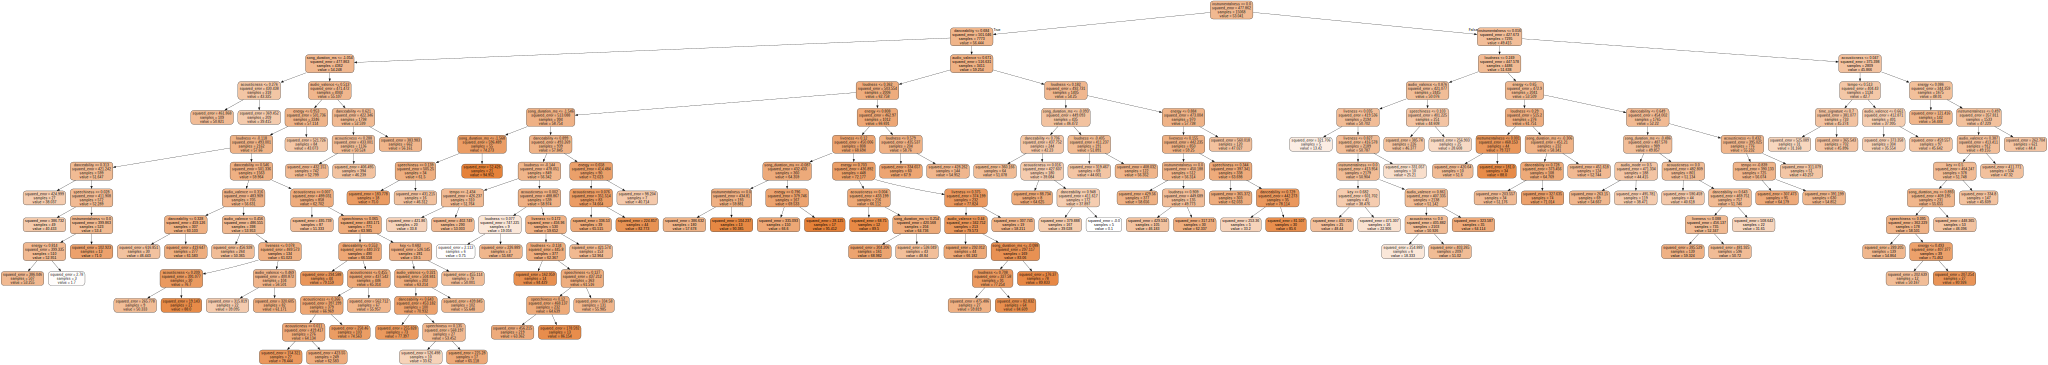

In [9]:
# Desenhar árvore
tr.export_graphviz(
    best_tree_model,
    out_file='tree.dot',
    feature_names=df_X_train.columns,
    #class_names=iris.target_names,
    rounded=True,
    filled=True
)
# From Aurelien Geron Book, pg. 196:
Source.from_file("tree.dot")

## 3. Algorithm: RANDOM FOREST REGRESSOR

### 3.1. Features Selection

In [ ]:
# FEATURES: no feature will be excluded, which means: features = df_X_train
# LABEL = df_y_train

### 3.2. Optimization & Holdout Validation (in steps...)

#### 3.2.0. Optimization Function

In [34]:
# FUNCTION RANDOM FOREST OPTIMIZATION
# INPUT: Parameter to be tested
# OUTPUT:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

def RegressionTree_Optimization(
        X_train: pd.core.frame.DataFrame,
        y_train: pd.core.frame.DataFrame,
        X_val: pd.core.frame.DataFrame,
        y_val: pd.core.frame.DataFrame,
        inEstimators: list,
        inMaxDepth: list,
        inImpurity: list,
        inMaxFeatures: list,
        inCCPalpha: list
) -> list:

    mse_list = list()
    FirstTime = True

    for i in range(len( inEstimators )):
        for j in range(len( inMaxDepth )):
            for k in range(len( inImpurity )):
                for l in range(len( inMaxFeatures )):
                    for m in range(len( inCCPalpha )):
                        # parameters
                        parameters = [ inEstimators[i], inMaxDepth[j], 
                                      inImpurity[k], inMaxFeatures[l], 
                                      inCCPalpha[m] ]
                        # definition
                        model = en.RandomForestRegressor(
                                   n_estimators=inEstimators[i],
                                   max_depth=inMaxDepth[j],
                                   min_impurity_decrease=inImpurity[k],
                                   max_features=inMaxFeatures[l],
                                   ccp_alpha=inCCPalpha[m],
                                   random_state=42 
                        )
                        # training
                        model.fit( X_train, y_train.values.ravel() )

                        # performance
                        yhat_val = model.predict( X_val )
                        performance = ShowMyPerformance( y_val.to_numpy(), yhat_val, True )
                        mse_list.append( performance[1] )

                        # Is this a best case? (testing MSE)
                        if FirstTime or performance[1] < best_performance[1]:
                                   FirstTime = False
                                   best_performance = performance
                                   best_rf_model = model
                                   best_parameters = parameters
                                   print("--> PARAMETERS = {}".format( best_parameters ))
                                   ShowMyPerformance( df_y_val.to_numpy(), yhat_val )

    return [ best_rf_model, best_performance, best_parameters, mse_list ]


#### 3.2.1. Optimize only MAX_DEPTH parameter

--> PARAMETERS = [100, 2, 0.0, 1.0, 0.0]
REGRESSION PERFORMANCE: R2=0.044726  MSE=456.154336  RMSE=21.357770  MAE=17.689076  MAPE=8.701293
--> PARAMETERS = [100, 3, 0.0, 1.0, 0.0]
REGRESSION PERFORMANCE: R2=0.066409  MSE=445.800496  RMSE=21.113988  MAE=17.786897  MAPE=8.701840
--> PARAMETERS = [100, 4, 0.0, 1.0, 0.0]
REGRESSION PERFORMANCE: R2=0.083592  MSE=437.595449  RMSE=20.918782  MAE=17.881162  MAPE=8.701975
--> PARAMETERS = [100, 5, 0.0, 1.0, 0.0]
REGRESSION PERFORMANCE: R2=0.098318  MSE=430.563739  RMSE=20.750030  MAE=17.983301  MAPE=8.708863
--> PARAMETERS = [100, 6, 0.0, 1.0, 0.0]
REGRESSION PERFORMANCE: R2=0.116524  MSE=421.870169  RMSE=20.539478  MAE=18.073779  MAPE=8.720399
--> PARAMETERS = [100, 7, 0.0, 1.0, 0.0]
REGRESSION PERFORMANCE: R2=0.136932  MSE=412.124800  RMSE=20.300857  MAE=18.168130  MAPE=8.728460
--> PARAMETERS = [100, 8, 0.0, 1.0, 0.0]
REGRESSION PERFORMANCE: R2=0.159094  MSE=401.542344  RMSE=20.038521  MAE=18.272250  MAPE=8.738612
--> PARAMETERS = [100, 9, 0

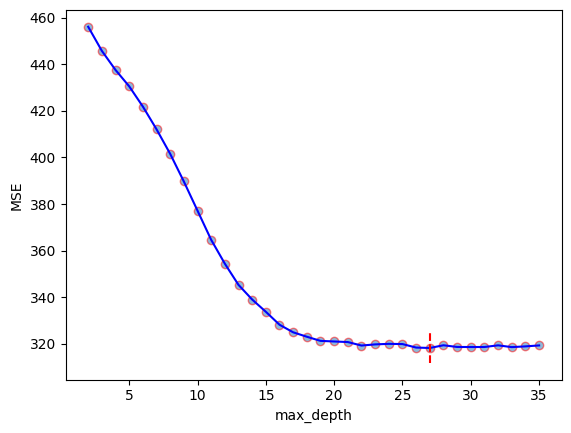

In [11]:
# Train: vary max_depth & keep others fixed.

ParA = list( range(  2,  36, 1 ) ) + [None]
mse_list = list()

# Best values

# Train: vary 'max_depth' & keep others in default values.
Answer = RegressionTree_Optimization(
    df_X_train, df_y_train,
    df_X_val, df_y_val,
    [100],  # n_estimators: int, default=100
    ParA,   # max_depth: int, default=None
    [0.0],  # min_impurity_decrease: float, default=0.0
    [1.0],  # max_features: {“sqrt”, “log2”, None}, int or float, default=1.0
    [0.0]   # ccp_alpha: non-negative float, default=0.0
)
# Results:
best_rf_model = Answer[0]
best_performance = Answer[1]
best_parameters = Answer[2]
mse_list = Answer[3]
best_mxdepth = best_parameters[1]

# Show best result:
print("")
print("----- FINAL RESULTS -----")
print("Performance: max_depth={}  R2={:.6f}  MSE={:.6f}  RMSE={:.6f}  MAE={:.6f}  MAPE={:.6f}"
      .format(best_parameters[1], best_performance[0], best_performance[1], 
              best_performance[2], best_performance[3], best_performance[4]))

# plot results
plt.plot( ParA, mse_list, color='b' )
plt.xlabel( 'max_depth' )
plt.ylabel( 'MSE' )
plt.scatter( ParA, mse_list, alpha=0.5, edgecolors='r' )
plt.vlines( best_parameters[1], 0.98*best_performance[1], 1.02*best_performance[1], 
            color='r', linestyle='--' )

# CONCLUSÃO EM RELAÇÃO A 'max_depth': conforme gráfico, usar entre 17 e 30, ou entre 20 e 30.


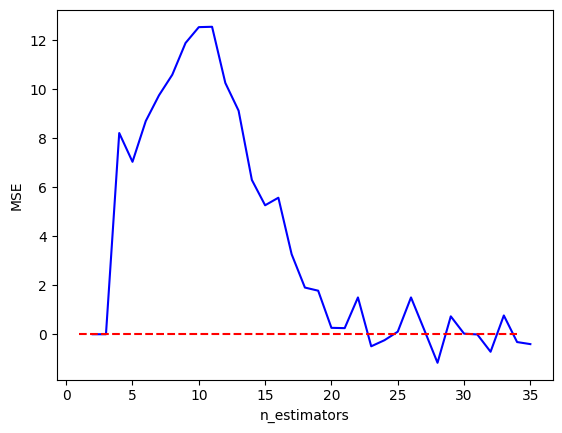

In [12]:
# first derivative of MSE
dMSE = []
for i in range( len(mse_list) ):
    if i<2:
        dMSE.append(0)
    else:
        dMSE.append( mse_list[i-1] - mse_list[i] )

# plot results
plt.plot( ParA, dMSE, color='b' )
plt.xlabel( 'n_estimators' )
plt.ylabel( 'MSE' )
plt.hlines( 0, 1, 34, color='r', linestyle='--' )


#### 3.2.2. Optimize only N_ESTIMATORS parameter

--> PARAMETERS = [40, 27, 0.0, 1.0, 0.0]
REGRESSION PERFORMANCE: R2=0.324416  MSE=322.599141  RMSE=17.961045  MAE=20.162422  MAPE=8.852609
--> PARAMETERS = [41, 27, 0.0, 1.0, 0.0]
REGRESSION PERFORMANCE: R2=0.324829  MSE=322.401992  RMSE=17.955556  MAE=20.163405  MAPE=8.852494
--> PARAMETERS = [48, 27, 0.0, 1.0, 0.0]
REGRESSION PERFORMANCE: R2=0.325437  MSE=322.111597  RMSE=17.947468  MAE=20.147609  MAPE=8.853586
--> PARAMETERS = [49, 27, 0.0, 1.0, 0.0]
REGRESSION PERFORMANCE: R2=0.325925  MSE=321.878635  RMSE=17.940976  MAE=20.145942  MAPE=8.852939
--> PARAMETERS = [55, 27, 0.0, 1.0, 0.0]
REGRESSION PERFORMANCE: R2=0.326788  MSE=321.466312  RMSE=17.929482  MAE=20.139151  MAPE=8.849894
--> PARAMETERS = [57, 27, 0.0, 1.0, 0.0]
REGRESSION PERFORMANCE: R2=0.327672  MSE=321.044575  RMSE=17.917717  MAE=20.135479  MAPE=8.848762
--> PARAMETERS = [58, 27, 0.0, 1.0, 0.0]
REGRESSION PERFORMANCE: R2=0.328276  MSE=320.756081  RMSE=17.909664  MAE=20.130827  MAPE=8.849913
--> PARAMETERS = [63, 27, 0

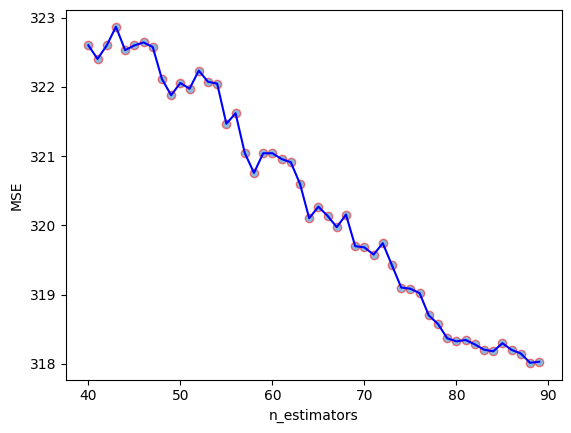

In [35]:
# Train: vary N_ESTIMATORS & keep others fixed.
# keep max_depth=27, due to previous simulation.

# n_estimators
ParB = list( np.arange(40, 90) )

mse_list = list()

# Best values
best_nestimators = 0

# Train: vary 'N_ESTIMATORS'
Answer = RegressionTree_Optimization(
    df_X_train, df_y_train,
    df_X_val, df_y_val,
    ParB,   # n_estimators: int, default=100
    [27],   # max_depth: int, default=None
    [0.0],  # min_impurity_decrease: float, default=0.0
    [1.0],  # max_features: {“sqrt”, “log2”, None}, int or float, default=1.0
    [0.0]   # ccp_alpha: non-negative float, default=0.0
)
# Results:
best_rf_model = Answer[0]
best_performance = Answer[1]
best_parameters = Answer[2]
mse_list = Answer[3]
best_nestimators = best_parameters[0]

# Show best result:
print("")
print("----- FINAL RESULTS -----")
print("Performance: n_estimators={}  R2={:.6f}  MSE={:.6f}  RMSE={:.6f}  MAE={:.6f}  MAPE={:.6f}"
      .format(best_nestimators, best_performance[0], best_performance[1], best_performance[2], best_performance[3], best_performance[4]))

# plot results
plt.plot( ParB, mse_list, color='b' )
plt.xlabel( 'n_estimators' )
plt.ylabel( 'MSE' )
plt.scatter( ParB, mse_list, alpha=0.5, edgecolors='r' )
#plt.vlines( best_nestimators, 0.98*best_performance[1], 1.02*best_performance[1], color='r', linestyle='--' )

# CONCLUSÃO EM RELAÇÃO AO PARÂMETRO 'n_estimators': Best=88. Usar entre 40 e 90, ou entre 60 e 90.

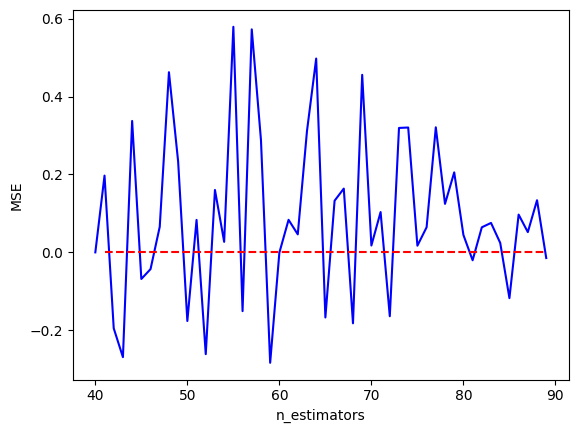

In [42]:
# first derivative of MSE
dMSE = []
for i in range( len(mse_list) ):
    if i==0:
        dMSE.append(0)
    else:
        dMSE.append( mse_list[i-1] - mse_list[i] )

# plot results
plt.plot( ParB, dMSE, color='b' )
plt.xlabel( 'n_estimators' )
plt.ylabel( 'MSE' )
plt.hlines( 0, 41, 89, color='r', linestyle='--' )


#### 3.2.3. Optimize only 'min_impurity_decrease' parameter

--> PARAMETERS = [88, 27, 0.0, 1.0, 0.0]
REGRESSION PERFORMANCE: R2=0.334018  MSE=318.014230  RMSE=17.832953  MAE=20.078547  MAPE=8.857322

----- FINAL RESULTS -----
Performance: min_impurity_decrease=0.0  R2=0.334018  MSE=318.014230  RMSE=17.832953  MAE=20.078547  MAPE=8.857322


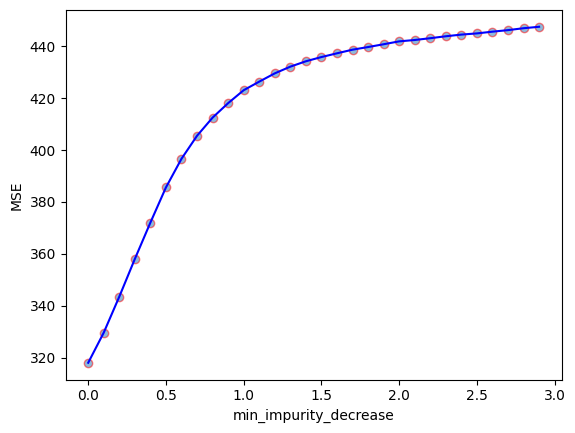

In [36]:
# Train: vary 'min_impurity_decrease' & keep others fixed. keep: max_depth=27, n_estimators=88

# min_impurity_decrease
ParC = list( np.arange( 0.0, 3.0, 0.1 ) )       

mse_list = list()

# Train: vary 'min_impurity_decrease'
Answer = RegressionTree_Optimization(
    df_X_train, df_y_train,
    df_X_val, df_y_val,
    [88],   # n_estimators: int, default=100
    [27],   # max_depth: int, default=None
    ParC,   # min_impurity_decrease: float, default=0.0
    [1.0],  # max_features: {“sqrt”, “log2”, None}, int or float, default=1.0
    [0.0]   # ccp_alpha: non-negative float, default=0.0
)
# Results:
best_rf_model = Answer[0]
best_performance = Answer[1]
best_parameters = Answer[2]
mse_list = Answer[3]
best_impurity = best_parameters[2]

# Show best result:
print("")
print("----- FINAL RESULTS -----")
print("Performance: min_impurity_decrease={}  R2={:.6f}  MSE={:.6f}  RMSE={:.6f}  MAE={:.6f}  MAPE={:.6f}"
      .format(best_impurity, best_performance[0], best_performance[1], best_performance[2], 
              best_performance[3], best_performance[4]))

# plot results
plt.plot( ParC, mse_list, color='b' )
plt.xlabel( 'min_impurity_decrease' )
plt.ylabel( 'MSE' )
plt.scatter( ParC, mse_list, alpha=0.5, edgecolors='r' )
#plt.vlines( best_nestimators, 0.98*best_performance[1], 1.02*best_performance[1], color='r', linestyle='--' )

# CONCLUSÃO EM RELAÇÃO AO PARÂMETRO 'min_impurity_decrease': manter no default, ZERO.

#### 3.2.4. Optimize only 'max_features' parameter

--> PARAMETERS = [88, 27, 0.0, None, 0.0]
REGRESSION PERFORMANCE: R2=0.334018  MSE=318.014230  RMSE=17.832953  MAE=20.078547  MAPE=8.857322
--> PARAMETERS = [88, 27, 0.0, 1, 0.0]
REGRESSION PERFORMANCE: R2=0.334991  MSE=317.549448  RMSE=17.819917  MAE=19.691850  MAPE=8.903271
--> PARAMETERS = [88, 27, 0.0, 2, 0.0]
REGRESSION PERFORMANCE: R2=0.340113  MSE=315.103908  RMSE=17.751166  MAE=19.803491  MAPE=8.881787

----- FINAL RESULTS -----
Performance: max_features=2  R2=0.340113  MSE=315.103908  RMSE=17.751166  MAE=19.803491  MAPE=8.881787


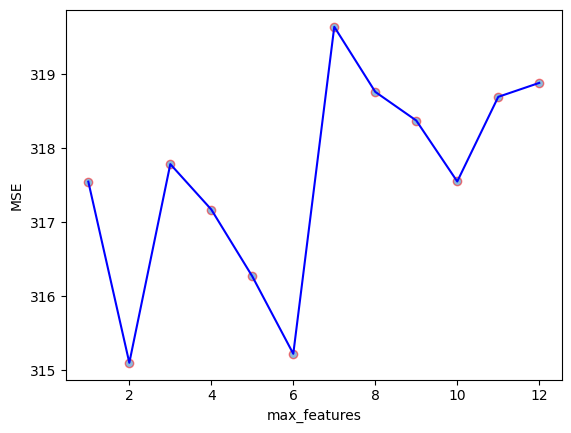

In [37]:
# Train: vary 'max_features' & keep others fixed.
# keep: max_depth=27, n_estimators=88, min_impurity_decrease=0

# max_features
ParC = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ]       

mse_list = list()

# Train: vary 'max_features'
Answer = RegressionTree_Optimization(
    df_X_train, df_y_train,
    df_X_val, df_y_val,
    [88],    # n_estimators: int, default=100
    [27],    # max_depth: int, default=None
    [0.0],   # min_impurity_decrease: float, default=0.0
    ParC,    # max_features: {“sqrt”, “log2”, None}, int or float, default=1.0
    [0.0]    # ccp_alpha: non-negative float, default=0.0
)
# Results:
best_rf_model = Answer[0]
best_performance = Answer[1]
best_parameters = Answer[2]
mse_list = Answer[3]
best_mxfeatures = best_parameters[3]

# Show best result:
print("")
print("----- FINAL RESULTS -----")
print("Performance: max_features={}  R2={:.6f}  MSE={:.6f}  RMSE={:.6f}  MAE={:.6f}  MAPE={:.6f}"
      .format(best_mxfeatures, best_performance[0], best_performance[1], best_performance[2], 
              best_performance[3], best_performance[4]))

# plot results
plt.plot( ParC, mse_list, color='b' )
plt.xlabel( 'max_features' )
plt.ylabel( 'MSE' )
plt.scatter( ParC, mse_list, alpha=0.5, edgecolors='r' )
#plt.vlines( best_nestimators, 0.98*best_performance[1], 1.02*best_performance[1], color='r', linestyle='--' )

# CONCLUSÃO EM RELAÇÃO AO PARÂMETRO 'max_features': manter = 2. Ou variar nos valores [ 2 .. 6 ]

#### 3.2.5. Optimize only 'ccp_alpha' parameter

--> PARAMETERS = [88, 27, 0.0, 2, 0.0]
REGRESSION PERFORMANCE: R2=0.340113  MSE=315.103908  RMSE=17.751166  MAE=19.803491  MAPE=8.881787

----- FINAL RESULTS -----
Performance: ccp_alpha=0.0  R2=0.340113  MSE=315.103908  RMSE=17.751166  MAE=19.803491  MAPE=8.881787


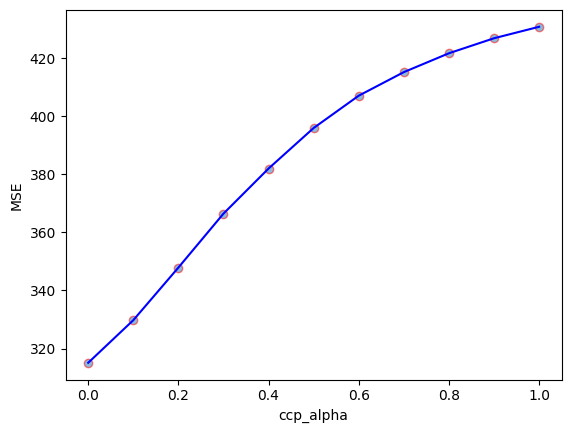

In [40]:
# Train: vary 'ccp_alpha' & keep others fixed.
# keep: max_depth=27, n_estimators=88, min_impurity_decrease=0, max_features=2

# ccp_alpha
ParD = list( np.arange( 0.0, 1.1, 0.1 ) )

mse_list = list()

# Train: vary 'ccp_alpha'
Answer = RegressionTree_Optimization(
    df_X_train, df_y_train,
    df_X_val, df_y_val,
    [88],    # n_estimators: int, default=100
    [27],    # max_depth: int, default=None
    [0.0],   # min_impurity_decrease: float, default=0.0
    [2],     # max_features: {“sqrt”, “log2”, None}, int or float, default=1.0
    ParD     # ccp_alpha: non-negative float, default=0.0
)
# Results:
best_rf_model = Answer[0]
best_performance = Answer[1]
best_parameters = Answer[2]
mse_list = Answer[3]
best_alpha = best_parameters[4]

# Show best result:
print("")
print("----- FINAL RESULTS -----")
print("Performance: ccp_alpha={}  R2={:.6f}  MSE={:.6f}  RMSE={:.6f}  MAE={:.6f}  MAPE={:.6f}"
      .format(best_alpha, best_performance[0], best_performance[1], 
              best_performance[2], best_performance[3], best_performance[4]))

# plot results
plt.plot( ParD, mse_list, color='b' )
plt.xlabel( 'ccp_alpha' )
plt.ylabel( 'MSE' )
plt.scatter( ParD, mse_list, alpha=0.5, edgecolors='r' )
#plt.vlines( best_nestimators, 0.98*best_performance[1], 1.02*best_performance[1], color='r', linestyle='--' )

# CONCLUSÃO EM RELAÇÃO AO PARÂMETRO 'ccp_alpha': manter no default, ZERO.

#### 3.2.6. Final Optimization: try around best values of n_estimators, max_depth & max_features

--> PARAMETERS = [88, 27, 0.0, 2, 0.0]
REGRESSION PERFORMANCE: R2=0.340113  MSE=315.103908  RMSE=17.751166  MAE=19.803491  MAPE=8.881787

----- FINAL RESULTS -----
Performance: estim.=88  depth=27  feat=2  R2=0.340113  MSE=315.103908  RMSE=17.751166  MAE=19.803491  MAPE=8.881787


Text(0, 0.5, 'MSE')

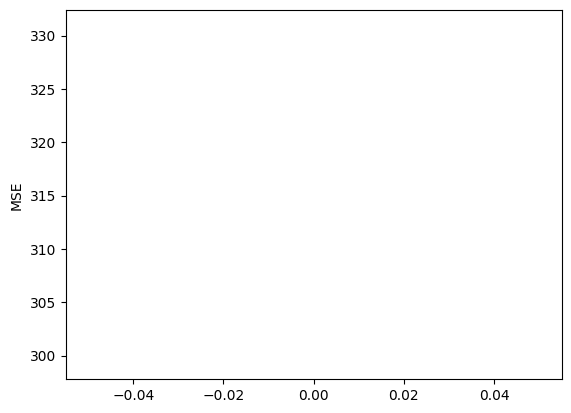

In [42]:
# Train: vary 'ccp_alpha' & keep others fixed.
# keep: max_depth=27, n_estimators=88, min_impurity_decrease=0, max_features=2

# CAUTION: SLOW PROCESSING. IT TAKES LONG TIME...

# max_depth
ParA = list( range(  20,  30 ) )
ParA = [27]

# n_estimators
ParB = list( np.arange(60, 90) )
ParB = [88]

# max_features
ParC = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ]
ParC = [2]

mse_list = list()

# Train: vary 'ccp_alpha'
Answer = RegressionTree_Optimization(
    df_X_train, df_y_train,
    df_X_val, df_y_val,
    ParB,    # n_estimators: int, default=100
    ParA,    # max_depth: int, default=None
    [0.0],   # min_impurity_decrease: float, default=0.0
    ParC,    # max_features: {“sqrt”, “log2”, None}, int or float, default=1.0
    [0.0]    # ccp_alpha: non-negative float, default=0.0
)
# Results:
best_rf_model = Answer[0]
best_performance = Answer[1]
best_parameters = Answer[2]
mse_list = Answer[3]
best_estimators = best_parameters[0]
best_mxdepth    = best_parameters[1]
best_mxfeatures = best_parameters[3]

# Show best result:
print("")
print("----- FINAL RESULTS -----")
print("Performance: estim.={}  depth={}  feat={}  R2={:.6f}  MSE={:.6f}  RMSE={:.6f}  MAE={:.6f}  MAPE={:.6f}"
      .format(best_estimators, best_mxdepth, best_mxfeatures, best_performance[0], best_performance[1], 
              best_performance[2], best_performance[3], best_performance[4]))

x = list( range(  0,  len(mse_list) ) )

# plot results
plt.plot( x, mse_list, color='b' )
plt.ylabel( 'MSE' )

# CONCLUSÃO: 

### 3.3. FIT Again for X_TRAIN + X_VAL

In [43]:
# ----- FINAL RESULTS -----
# PARAMETERS = [88, 27, 0.0, 2, 0.0]
# Performance: estim.=88  depth=27  feat=2  R2=0.340113  MSE=315.103908  RMSE=17.751166  MAE=19.803491  MAPE=8.881787
best_rf_model

RandomForestRegressor(max_depth=27, max_features=2, n_estimators=88,
                      random_state=42)

In [44]:
# Training Random-Forest:
best_rf_model.fit(
    np.concatenate( (df_X_train, df_X_val) ),
    np.concatenate( (df_y_train, df_y_val) ) 
)

c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=27, max_features=2, n_estimators=88,
                      random_state=42)

### 3.4. Final Performance (TVT)

##### 3.4.1. X_Train

In [45]:
yhat_train = best_rf_model.predict( df_X_train )
indicator = ShowMyPerformance( df_y_train.to_numpy(), yhat_train )

c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


REGRESSION PERFORMANCE: R2=0.902694  MSE=46.513332  RMSE=6.820068  MAE=22.099009  MAPE=8.894878


##### 3.4.2. X_val

In [46]:
yhat_val = best_rf_model.predict( df_X_val )
indicator = ShowMyPerformance( df_y_val.to_numpy(), yhat_val )

c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


REGRESSION PERFORMANCE: R2=0.900985  MSE=47.280987  RMSE=6.876117  MAE=22.071507  MAPE=8.831238


##### 3.4.3. X_Test

In [47]:
yhat_test = best_rf_model.predict( df_X_test )
indicator = ShowMyPerformance( df_y_test.to_numpy(), yhat_test )

c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


REGRESSION PERFORMANCE: R2=0.395945  MSE=294.114803  RMSE=17.149776  MAE=20.313250  MAPE=8.900630


## 4. Algorithm: POLINOMIAL REGRESSION

### 4.1. Features Selection

In [ ]:
# FEATURES: no feature will be excluded, which means: features = df_X_train
# LABEL = df_y_train

### 4.2. Optimization & Holdout Validation

#### 4.2.0. Optimization Function

In [5]:
# FUNCTION: POLYNOMIAL OPTIMIZATION
# INPUT: Parameter to be tested
# OUTPUT:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

def Polynomial_Optimization(
        #X_train: pd.core.frame.DataFrame,
        #y_train: pd.core.frame.DataFrame,
        #X_val: pd.core.frame.DataFrame,
        #y_val: pd.core.frame.DataFrame,
        inDegree: list,
        inInteractionOnly: list,
        inIncludeBias: list
) -> list:

    # ACCESSING GLOBALLY:
    # df_X_train, df_y_train,
    # df_X_val, df_y_val,

    mse_list = list()
    FirstTime = True

    for i in range(len( inDegree )):
        print("--> i={} - Degree {}".format( i, inDegree[i] ))
        for j in range(len( inInteractionOnly )):
            for k in range(len( inIncludeBias )):
                # parameters
                parameters = [ inDegree[i], inInteractionOnly[j], inIncludeBias[k] ]
                # definition
                poly = pp.PolynomialFeatures(
                            degree=inDegree[i],
                            interaction_only=inInteractionOnly[j],
                            include_bias=inIncludeBias[k]
                )
                X_poly_train = poly.fit_transform( df_X_train.to_numpy() )
                X_poly_val   = poly.fit_transform( df_X_val.to_numpy() )
                #print( "shape: X_train={}  X.val={}".format(X_poly_train.shape, X_poly_val.shape ) )
                
                # training
                model = lm.LinearRegression()
                #print( "shape: y.train={}".format(y_train.to_numpy().shape) )
                model.fit( X_poly_train, df_y_train.to_numpy() )

                # performance
                yhat_val = model.predict( X_poly_val )
                performance = ShowMyPerformance( df_y_val.to_numpy(), yhat_val, True )
                mse_list.append( performance[1] )

                # Is this a best case? (testing MSE)
                if FirstTime or performance[1] < best_performance[1]:
                    FirstTime = False
                    best_performance = performance
                    best_poly_model = model
                    best_parameters = parameters
                    print("--> PARAMETERS = {}".format( best_parameters ))
                    ShowMyPerformance( df_y_val.to_numpy(), yhat_val )

    return [ best_poly_model, best_performance, best_parameters, mse_list ]



#### 4.2.1. Optimize for DEGREE parameter

--> i=0 - Degree 2
--> PARAMETERS = [2, False, True]
REGRESSION PERFORMANCE: R2=0.066477  MSE=445.768223  RMSE=21.113224  MAE=16.749939  MAPE=8.547931
--> i=1 - Degree 3
--> i=2 - Degree 4
--> i=3 - Degree 5
--> i=4 - Degree 6

----- FINAL RESULTS -----
Performance: Degree=2  R2=0.066477  MSE=445.768223  RMSE=21.113224  MAE=16.749939  MAPE=8.547931


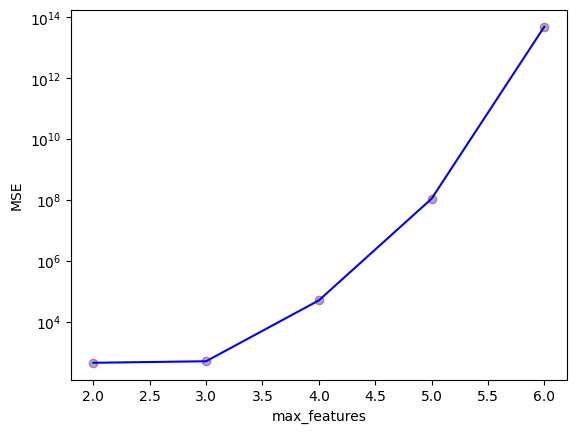

In [13]:
# Train: vary max_depth & keep others fixed.

Par1_degree      = list( range(  2,  7 ) )
Par2_interaction = [False]
Par3_bias        = [True]

mse_list = list()

# Train
Answer = Polynomial_Optimization(
    #df_X_train, df_y_train,
    #df_X_val, df_y_val,
    Par1_degree,
    Par2_interaction,
    Par3_bias
)
# Results:
best_poly_model = Answer[0]
best_performance = Answer[1]
best_parameters = Answer[2]
mse_list = Answer[3]

# Show best result:
print("")
print("----- FINAL RESULTS -----")
print("Performance: Degree={}  R2={:.6f}  MSE={:.6f}  RMSE={:.6f}  MAE={:.6f}  MAPE={:.6f}"
      .format(best_parameters[0], best_performance[0], best_performance[1], best_performance[2], 
              best_performance[3], best_performance[4]))

# plot results
plt.yscale('log')
plt.plot( Par1_degree, mse_list, color='b' )
plt.xlabel( 'max_features' )
plt.ylabel( 'MSE' )
plt.scatter( Par1_degree, mse_list, alpha=0.5, edgecolors='r' )

# CONCLUSION: best model: order=2
# --> PARAMETERS = [2, False, True]
# REGRESSION PERFORMANCE: R2=0.066477  MSE=445.768223  RMSE=21.113224  MAE=16.749939  MAPE=8.547931


### 4.3. FIT Again for X_TRAIN + X_VAL

In [16]:
# Training:

poly = pp.PolynomialFeatures(
            degree=best_parameters[0],
            interaction_only=best_parameters[1],
            include_bias=best_parameters[2]
)
X_poly_train = poly.fit_transform( np.concatenate( (df_X_train, df_X_val) ) )
best_poly_model.fit(
    X_poly_train,
    np.concatenate( (df_y_train, df_y_val) )
)

LinearRegression()

### 4.4. Final Performance (TVT)

##### 4.4.1. X_Train

In [19]:
X_poly_train = poly.fit_transform( df_X_train.to_numpy() )
yhat_train = best_poly_model.predict( X_poly_train )
indicator = ShowMyPerformance( df_y_train.to_numpy(), yhat_train )

REGRESSION PERFORMANCE: R2=0.091791  MSE=434.135084  RMSE=20.835909  MAE=16.505083  MAPE=8.386161


##### 4.4.2. X_Val

In [20]:
X_poly_val = poly.fit_transform( df_X_val.to_numpy() )
yhat_val = best_poly_model.predict( X_poly_val )
indicator = ShowMyPerformance( df_y_val.to_numpy(), yhat_val )

REGRESSION PERFORMANCE: R2=0.080554  MSE=439.046232  RMSE=20.953430  MAE=16.620267  MAPE=8.508183


##### 4.4.3. X_Test

In [21]:
X_poly_test = poly.fit_transform( df_X_test.to_numpy() )
yhat_test = best_poly_model.predict( X_poly_test )
indicator = ShowMyPerformance( df_y_test.to_numpy(), yhat_test )

REGRESSION PERFORMANCE: R2=0.090901  MSE=442.641386  RMSE=21.039044  MAE=16.736414  MAPE=8.276972


## 5. Algorithm: LINEAR REGRESSION LASSO

### 5.1. Features Selection

In [ ]:
# FEATURES: no feature will be excluded, which means: features = df_X_train
# LABEL = df_y_train

### 5.2. Optimization & Holdout Validation

--> PARAMETERS = 0.003
REGRESSION PERFORMANCE: R2=0.039952  MSE=458.433934  RMSE=21.411070  MAE=17.737942  MAPE=8.697297
--> PARAMETERS = 0.0035
REGRESSION PERFORMANCE: R2=0.039955  MSE=458.432822  RMSE=21.411044  MAE=17.736825  MAPE=8.697277
--> PARAMETERS = 0.004
REGRESSION PERFORMANCE: R2=0.039956  MSE=458.432007  RMSE=21.411025  MAE=17.735713  MAPE=8.697258
--> PARAMETERS = 0.0045000000000000005
REGRESSION PERFORMANCE: R2=0.039957  MSE=458.431490  RMSE=21.411013  MAE=17.734606  MAPE=8.697239
--> PARAMETERS = 0.005
REGRESSION PERFORMANCE: R2=0.039958  MSE=458.431269  RMSE=21.411008  MAE=17.733503  MAPE=8.697220

----- FINAL RESULTS -----
Performance: alpha=0.005  R2=0.039958  MSE=458.431269  RMSE=21.411008  MAE=17.733503  MAPE=8.697220


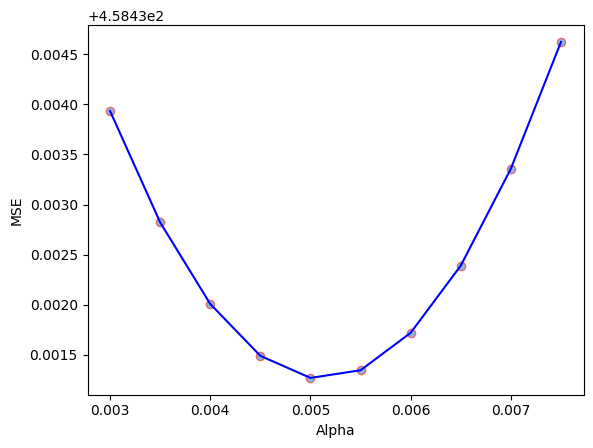

In [7]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

ParAlpha = list( np.arange( 0.003, 0.008, 0.0005 ) )
#ParAlpha += list( np.arange( 4.0, 10.1, 1.0 ) )

mse_list = list()

FirstTime = True
for i in range(len( ParAlpha )):

    # Definition: Lasso Model - L1 (parameters tend to zero)
    lasso_model = lm.Lasso( alpha=ParAlpha[i] )

    # Model train
    lasso_model.fit( df_X_train, df_y_train )

    # Performance
    yhat_val = lasso_model.predict( df_X_val )
    performance = ShowMyPerformance( df_y_val.to_numpy(), yhat_val, True )
    mse_list.append( performance[1] )

    # Is this a best case? (testing MSE)
    if FirstTime or performance[1] < best_performance[1]:
        FirstTime = False
        best_performance = performance
        best_lasso_model = lasso_model
        best_parameters = ParAlpha[i]
        print("--> PARAMETERS = {}".format( best_parameters ))
        ShowMyPerformance( df_y_val.to_numpy(), yhat_val )

# Show best result:
print("")
print("----- FINAL RESULTS -----")
print("Performance: alpha={}  R2={:.6f}  MSE={:.6f}  RMSE={:.6f}  MAE={:.6f}  MAPE={:.6f}"
      .format(best_parameters, best_performance[0], best_performance[1], 
              best_performance[2], best_performance[3], best_performance[4]))

# plot results
plt.plot( ParAlpha, mse_list, color='b' )
plt.xlabel( 'Alpha' )
plt.ylabel( 'MSE' )
plt.scatter( ParAlpha, mse_list, alpha=0.5, edgecolors='r' )
#plt.vlines( best_parameters, best_performance[1], 1.02*best_performance[1], color='r', linestyle='--' )

# CONCLUSION: Best ALPHA = 0,005
# ALPHA=0.005 - R2=0.039958  MSE=458.431269  RMSE=21.411008  MAE=17.733503  MAPE=8.697220

### 5.3. FIT Again for X_TRAIN + X_VAL

In [8]:
# Training:
best_lasso_model.fit(
    np.concatenate( (df_X_train, df_X_val) ),
    np.concatenate( (df_y_train, df_y_val) ) 
)

Lasso(alpha=0.005)

### 5.4. Final Performance (TVT)

##### 5.4.1. X_Train

In [9]:
# TRAIN SET

y_train_pred = best_lasso_model.predict( df_X_train )

# Performance
ShowMyPerformance( df_y_train.to_numpy(), y_train_pred )

c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


REGRESSION PERFORMANCE: R2=0.045779  MSE=456.129707  RMSE=21.357193  MAE=17.750254  MAPE=8.745456


[0.04577882436103353,
 456.1297069541339,
 21.35719333044803,
 17.750253638862638,
 8.745455720401461]

##### 5.4.2. X_Val

In [10]:
# VALIDATION SET

y_val_pred = best_lasso_model.predict( df_X_val )

# Performance
ShowMyPerformance( df_y_val.to_numpy(), y_val_pred )

c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


REGRESSION PERFORMANCE: R2=0.041239  MSE=457.819465  RMSE=21.396716  MAE=17.724148  MAPE=8.692600


[0.04123909452104835,
 457.8194654561383,
 21.39671623067751,
 17.724147951500306,
 8.692600166973879]

##### 5.4.3. X_Test

In [11]:
# TEST SET

y_test_pred = best_lasso_model.predict( df_X_test )

# Performance
ShowMyPerformance( df_y_test.to_numpy(), y_test_pred )

REGRESSION PERFORMANCE: R2=0.051011  MSE=462.063437  RMSE=21.495661  MAE=17.919813  MAPE=8.730630


c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


[0.051011479514093794,
 462.0634367302442,
 21.495660881448707,
 17.919812626308858,
 8.730629627164337]

## 6. Algorithm: LINEAR REGRESSION RIDGE

### 6.1. Features Selection

In [ ]:
# FEATURES: no feature will be excluded, which means: features = df_X_train
# LABEL = df_y_train

### 6.2. Optimization & Holdout Validation

--> PARAMETERS = 1.0
REGRESSION PERFORMANCE: R2=0.039928  MSE=458.445477  RMSE=21.411340  MAE=17.039472  MAPE=8.682412
--> PARAMETERS = 2.0
REGRESSION PERFORMANCE: R2=0.039931  MSE=458.444152  RMSE=21.411309  MAE=17.039201  MAPE=8.682285
--> PARAMETERS = 3.0
REGRESSION PERFORMANCE: R2=0.039933  MSE=458.443057  RMSE=21.411283  MAE=17.038968  MAPE=8.682161
--> PARAMETERS = 4.0
REGRESSION PERFORMANCE: R2=0.039935  MSE=458.442181  RMSE=21.411263  MAE=17.038733  MAPE=8.682039
--> PARAMETERS = 5.0
REGRESSION PERFORMANCE: R2=0.039936  MSE=458.441514  RMSE=21.411247  MAE=17.038532  MAPE=8.681918
--> PARAMETERS = 6.0
REGRESSION PERFORMANCE: R2=0.039937  MSE=458.441050  RMSE=21.411237  MAE=17.038337  MAPE=8.681800
--> PARAMETERS = 7.0
REGRESSION PERFORMANCE: R2=0.039938  MSE=458.440782  RMSE=21.411230  MAE=17.038144  MAPE=8.681683
--> PARAMETERS = 8.0
REGRESSION PERFORMANCE: R2=0.039938  MSE=458.440703  RMSE=21.411228  MAE=17.037961  MAPE=8.681568

----- FINAL RESULTS -----
Performance: alpha=8.

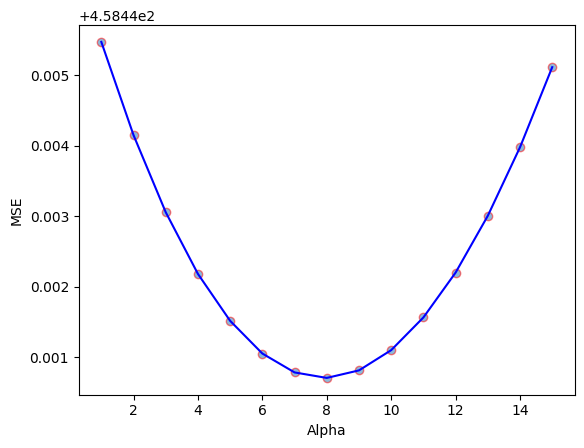

In [4]:
#ParAlpha = list( np.arange( 0.1, 3.3, 0.2 ) )
#ParAlpha += list( np.arange( 4.0, 10.1, 0.5 ) )
#ParAlpha += list( np.arange( 11.0, 20.1, 1.0 ) )

ParAlpha = list( np.arange( 1.0, 15.5, 1.0 ) )

mse_list = list()

FirstTime = True
for i in range(len( ParAlpha )):

    # Definition: Ridge - L2 (smoothing parameters)
    ridge_model = lm.Ridge( alpha=ParAlpha[i] )

    # Model train
    ridge_model.fit( df_X_train, df_y_train )

    # Performance
    yhat_val = ridge_model.predict( df_X_val )
    performance = ShowMyPerformance( df_y_val.to_numpy(), yhat_val, True )
    mse_list.append( performance[1] )

    # Is this a best case? (testing MSE)
    if FirstTime or performance[1] < best_performance[1]:
        FirstTime = False
        best_performance = performance
        best_ridge_model = ridge_model
        best_parameters = ParAlpha[i]
        print("--> PARAMETERS = {}".format( best_parameters ))
        ShowMyPerformance( df_y_val.to_numpy(), yhat_val )

# Show best result:
print("")
print("----- FINAL RESULTS -----")
print("Performance: alpha={}  R2={:.6f}  MSE={:.6f}  RMSE={:.6f}  MAE={:.6f}  MAPE={:.6f}"
      .format(best_parameters, best_performance[0], best_performance[1], 
              best_performance[2], best_performance[3], best_performance[4]))

# plot results
plt.plot( ParAlpha, mse_list, color='b' )
plt.xlabel( 'Alpha' )
plt.ylabel( 'MSE' )
plt.scatter( ParAlpha, mse_list, alpha=0.5, edgecolors='r' )
#plt.vlines( best_parameters, best_performance[1], 1.02*best_performance[1], color='r', linestyle='--' )

# CONCLUSÃO: best alpha = 8.0
# Performance: alpha=8.0  R2=0.039938  MSE=458.440703  RMSE=21.411228  MAE=17.037961  MAPE=8.681568

### 6.3. FIT Again for X_TRAIN + X_VAL

In [5]:
# Training:
best_ridge_model.fit(
    np.concatenate( (df_X_train, df_X_val) ),
    np.concatenate( (df_y_train, df_y_val) ) 
)

Ridge(alpha=8.0)

### 6.4. Final Performance (TVT)

##### 6.4.1. X_Train

In [6]:
# TRAIN SET

y_train_pred = best_ridge_model.predict( df_X_train )

# Performance
ShowMyPerformance( df_y_train.to_numpy(), y_train_pred )

REGRESSION PERFORMANCE: R2=0.045811  MSE=456.114425  RMSE=21.356836  MAE=17.007839  MAPE=8.647086


c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


[0.0458107932562426,
 456.1144254206952,
 21.356835566644587,
 17.00783895612643,
 8.647086297060506]

##### 6.4.2. X_Val

In [7]:
# VALIDATION SET

y_val_pred = best_ridge_model.predict( df_X_val )

# Performance
ShowMyPerformance( df_y_val.to_numpy(), y_val_pred )

REGRESSION PERFORMANCE: R2=0.041206  MSE=457.835218  RMSE=21.397084  MAE=17.033185  MAPE=8.672525


c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


[0.04120610604443464,
 457.8352178367821,
 21.397084330272246,
 17.03318467203912,
 8.672524687278068]

##### 6.4.3. X_Test

In [8]:
# TEST SET

y_test_pred = best_ridge_model.predict( df_X_test )

# Performance
ShowMyPerformance( df_y_test.to_numpy(), y_test_pred )

REGRESSION PERFORMANCE: R2=0.051144  MSE=461.999056  RMSE=21.494163  MAE=17.142654  MAPE=8.536596


c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


[0.05114370460750217,
 461.9990562032269,
 21.494163305493586,
 17.14265395351758,
 8.536595972140402]

## 7. Algorithm: LINEAR REGRESSION ELASTIC NET

### 7.1. Features Selection

In [ ]:
# FEATURES: no feature will be excluded, which means: features = df_X_train
# LABEL = df_y_train

### 7.2. Optimization & Holdout Validation

##### 7.2.1. Optimization Function

In [9]:
# FUNCTION LINEAR REGRESSION ELASTIC NET OPTIMIZATION
# INPUT: Parameter ALPHA to be tested
# OUTPUT:

def ElasticNet_Optimization( inAlpha: list ) -> list:

    inRatio  = [ 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05 ]
    inRatio += list( np.arange( 0.1, 0.91, 0.1 ) )
    inRatio += [ 1-0.0001, 1-0.0005, 1-0.001, 1-0.005, 1-0.01, 1-0.05 ]

    Ratio_list = [ 0.0 ] * len(inAlpha)
    mse_list = [ 0.0 ] * len(inAlpha)

    FirstTime = True
    for i in range(len( inAlpha )):
        print("--> i={} - Alpha {}".format( i, inAlpha[i] ))
        FirstRatio = True
        for j in range(len( inRatio )):
            # parameters
            parameters = [ inAlpha[i], inRatio[j] ]

            # Definition: Elasticnet = L1 + L2
            elasticnet_model = lm.ElasticNet( alpha=inAlpha[i], l1_ratio=inRatio[j] )

            # Model train
            elasticnet_model.fit( df_X_train, df_y_train )

            # Performance
            yhat_val = elasticnet_model.predict( df_X_val )
            performance = ShowMyPerformance( df_y_val.to_numpy(), yhat_val, True )

            # Is this case the best for this ALPHA?
            if FirstRatio or performance[1] < best_local_performance[1]:
                FirstRatio = False
                best_local_performance = performance
                Ratio_list[i] = inRatio[j]
                mse_list[i] = performance[1]

            # Is this a global best case? (testing MSE)
            if FirstTime or performance[1] < best_performance[1]:
                FirstTime = False
                best_performance = performance
                best_elasticnet_model = elasticnet_model
                best_parameters = parameters
                #print("--> PARAMETERS = {}".format( best_parameters ))
                #ShowMyPerformance( df_y_val.to_numpy(), yhat_val )

    return [ best_elasticnet_model, best_performance, best_parameters, mse_list, Ratio_list ]


##### 7.2.2. Optimization

--> i=0 - Alpha 0.01
--> i=1 - Alpha 0.05
--> i=2 - Alpha 0.1
--> i=3 - Alpha 0.5
--> i=4 - Alpha 1.0
--> i=5 - Alpha 2.0
--> i=6 - Alpha 4.0
--> i=7 - Alpha 6.0
--> i=8 - Alpha 8.0
--> i=9 - Alpha 10.0

----- FINAL RESULTS -----
Performance: Alpha=0.01  Ratio=0.9999  R2=0.039928  MSE=458.445421  RMSE=21.411339  MAE=17.722765  MAPE=8.697035


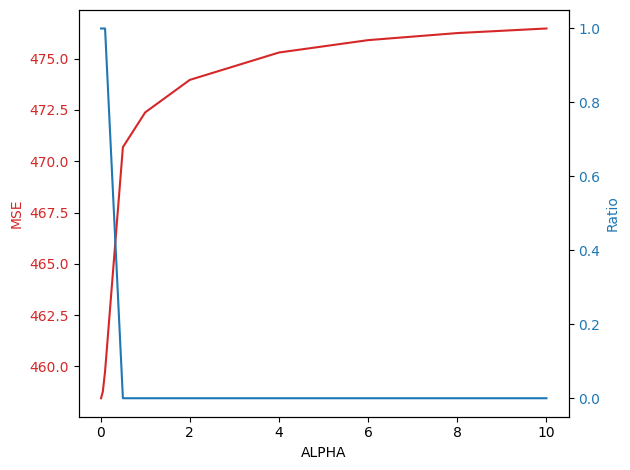

In [10]:
Par1_alpha = [ 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 4.0, 6.0, 8.0, 10.0  ]

# Train
Answer = ElasticNet_Optimization( Par1_alpha )

# Results:
best_elasticnet_model = Answer[0]
best_performance = Answer[1]
best_parameters = Answer[2]
mse_list = Answer[3]
ratio_list = Answer[4]

# Show best result:
print("")
print("----- FINAL RESULTS -----")
print("Performance: Alpha={}  Ratio={}  R2={:.6f}  MSE={:.6f}  RMSE={:.6f}  MAE={:.6f}  MAPE={:.6f}"
      .format(best_parameters[0], best_parameters[1], best_performance[0], best_performance[1], 
              best_performance[2], best_performance[3], best_performance[4]))

# plot results
# REF: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('ALPHA')
ax1.set_ylabel('MSE', color=color)
ax1.plot(Par1_alpha, mse_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Ratio', color=color)
ax2.plot(Par1_alpha, ratio_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

# CONCLUSION: best result found with ALPHA ~ zero & RATIO ~ 1
# Performance: Alpha=0.1   Ratio=0.9999  R2=0.037193  MSE=459.751545  RMSE=21.441818  MAE=17.579974  MAPE=8.691092
# Performance: Alpha=0.01  Ratio=0.9999  R2=0.039928  MSE=458.445421  RMSE=21.411339  MAE=17.722765  MAPE=8.697035


### 7.3. FIT Again for X_TRAIN + X_VAL

In [11]:
# Training:
best_elasticnet_model.fit(
    np.concatenate( (df_X_train, df_X_val) ),
    np.concatenate( (df_y_train, df_y_val) ) 
)

ElasticNet(alpha=0.01, l1_ratio=0.9999)

### 7.4. Final Performance (TVT)

##### 7.4.1. X_Train

In [12]:
# TRAIN SET

y_train_pred = best_elasticnet_model.predict( df_X_train )

# Performance
ShowMyPerformance( df_y_train.to_numpy(), y_train_pred )

c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


REGRESSION PERFORMANCE: R2=0.045664  MSE=456.184690  RMSE=21.358481  MAE=17.739596  MAPE=8.745246


[0.04566379987906111,
 456.18469010122186,
 21.35848051948504,
 17.739596107987047,
 8.745246347925544]

##### 7.4.2. X_Val

In [13]:
# VALIDATION SET

y_val_pred = best_elasticnet_model.predict( df_X_val )

# Performance
ShowMyPerformance( df_y_val.to_numpy(), y_val_pred )

c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


REGRESSION PERFORMANCE: R2=0.041183  MSE=457.846083  RMSE=21.397338  MAE=17.713636  MAPE=8.692405


[0.04118335301196374,
 457.84608267399415,
 21.397338214693765,
 17.71363619444617,
 8.69240459903587]

##### 7.4.3. X_Test

In [14]:
# TEST SET

y_test_pred = best_elasticnet_model.predict( df_X_test )

# Performance
ShowMyPerformance( df_y_test.to_numpy(), y_test_pred )

c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


REGRESSION PERFORMANCE: R2=0.050799  MSE=462.167094  RMSE=21.498072  MAE=17.909968  MAPE=8.730213


[0.050798588328760164,
 462.16709365614093,
 21.49807185903287,
 17.90996811233423,
 8.730213125661702]

## 8. Algorithm: POLINOMIAL REGRESSION LASSO

### 8.1. Features Selection

In [ ]:
# FEATURES: no feature will be excluded, which means: features = df_X_train
# LABEL = df_y_train

### 8.2. Optimization & Holdout Validation

##### 8.2.1. Optimization Function

In [15]:
def PolyLasso_Optimization(
        inDegree: list,
        inInteractionOnly: list,
        inIncludeBias: list,
        inAlpha: list
) -> list:

    # ACCESSING GLOBALLY:
    # df_X_train, df_y_train,
    # df_X_val, df_y_val,

    mse_list = list()
    FirstTime = True

    for i in range(len( inDegree )):
        print("--> i={} - Degree {}".format( i, inDegree[i] ))
        for j in range(len( inInteractionOnly )):
            for k in range(len( inIncludeBias )):
                for l in range(len( inAlpha )):
                    # parameters
                    parameters = [ inDegree[i], inInteractionOnly[j], 
                                   inIncludeBias[k], inAlpha[l] ]
                    # definition
                    poly = pp.PolynomialFeatures(
                                degree=inDegree[i],
                                interaction_only=inInteractionOnly[j],
                                include_bias=inIncludeBias[k]
                    )
                    X_poly_train = poly.fit_transform( df_X_train.to_numpy() )
                    X_poly_val   = poly.fit_transform( df_X_val.to_numpy() )
                    
                    # training: Lasso - L1 (tende a zerar os parâmetros)
                    model = lm.Lasso( alpha=inAlpha[l] )
                    model.fit( X_poly_train, df_y_train.to_numpy() )

                    # performance
                    yhat_val = model.predict( X_poly_val )
                    performance = ShowMyPerformance( df_y_val.to_numpy(), yhat_val, True )
                    mse_list.append( performance[1] )

                    # Is this a best case? (testing MSE)
                    if FirstTime or performance[1] < best_performance[1]:
                        FirstTime = False
                        best_performance = performance
                        best_polylasso_model = model
                        best_parameters = parameters
                        print("--> PARAMETERS = {}".format( best_parameters ))
                        ShowMyPerformance( df_y_val.to_numpy(), yhat_val )

    return [ best_polylasso_model, best_performance, best_parameters, mse_list ]


##### 8.2.2. Optimization

--> i=0 - Degree 2
--> PARAMETERS = [2, False, True, 0.003]
REGRESSION PERFORMANCE: R2=0.067923  MSE=445.077628  RMSE=21.096863  MAE=18.099990  MAPE=8.703571
--> PARAMETERS = [2, False, True, 0.005]
REGRESSION PERFORMANCE: R2=0.068163  MSE=444.962829  RMSE=21.094142  MAE=18.072469  MAPE=8.704737
--> PARAMETERS = [2, False, True, 0.006]
REGRESSION PERFORMANCE: R2=0.068418  MSE=444.841218  RMSE=21.091259  MAE=18.060085  MAPE=8.705200
--> PARAMETERS = [2, False, True, 0.007]
REGRESSION PERFORMANCE: R2=0.068610  MSE=444.749674  RMSE=21.089089  MAE=18.049693  MAPE=8.705601
--> PARAMETERS = [2, False, True, 0.008]
REGRESSION PERFORMANCE: R2=0.068671  MSE=444.720461  RMSE=21.088396  MAE=18.040024  MAPE=8.705917

----- FINAL RESULTS -----
Parameters = [2, False, True, 0.008]
Performance: Degree=2  R2=0.068671  MSE=444.720461  RMSE=21.088396  MAE=18.040024  MAPE=8.705917


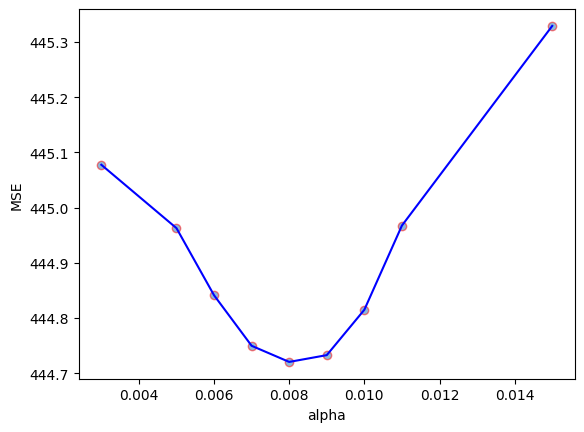

In [18]:
#Par1_degree      = list( range(  2,  7 ) )
Par1_degree      = [ 2 ]
Par2_interaction = [False]
Par3_bias        = [True]

#Par4_alpha = list( np.arange( 0.04, 0.065, 0.005 ) )
#Par4_alpha = [ 0.05 ]

Par4_alpha  = [ 0.003, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.015 ]
#Par4_alpha += list( np.arange( 0.1, 3.1, 0.1 ) )
#Par4_alpha += list( np.arange( 4.0, 10.1, 1.0 ) )

mse_list = list()

# Train
Answer = PolyLasso_Optimization(
    Par1_degree,
    Par2_interaction,
    Par3_bias,
    Par4_alpha
)
# Results:
best_polylasso_model = Answer[0]
best_performance = Answer[1]
best_parameters = Answer[2]
mse_list = Answer[3]

# Show best result:
print("")
print("----- FINAL RESULTS -----")
print( "Parameters = {}".format(best_parameters) )
print("Performance: Degree={}  R2={:.6f}  MSE={:.6f}  RMSE={:.6f}  MAE={:.6f}  MAPE={:.6f}"
      .format(best_parameters[0], best_performance[0], best_performance[1], best_performance[2], 
              best_performance[3], best_performance[4]))

# plot results
#plt.yscale('log')
plt.plot( Par4_alpha, mse_list, color='b' )
plt.xlabel( 'alpha' )
plt.ylabel( 'MSE' )
plt.scatter( Par4_alpha, mse_list, alpha=0.5, edgecolors='r' )

# CONCLUSÃO:
# Degree=2  Alpha=0.008 - R2=0.068671  MSE=444.720461  RMSE=21.088396  MAE=18.040024  MAPE=8.705917
# Degree=3  Alpha=0.05  - R2=0.060929  MSE=448.417164  RMSE=21.175863  MAE=17.952389  MAPE=8.700838


### 8.3. FIT Again for X_TRAIN + X_VAL

In [19]:
# Training:

poly = pp.PolynomialFeatures(
            degree=best_parameters[0],
            interaction_only=best_parameters[1],
            include_bias=best_parameters[2]
)
X_poly_train = poly.fit_transform( np.concatenate( (df_X_train, df_X_val) ) )
best_polylasso_model.fit(
    X_poly_train,
    np.concatenate( (df_y_train, df_y_val) )
)

Lasso(alpha=0.008)

### 8.4. Final Performance (TVT)

##### 8.4.1. X_Train

In [20]:
# TRAINING SET
poly = pp.PolynomialFeatures(
            degree=best_parameters[0],
            interaction_only=best_parameters[1],
            include_bias=best_parameters[2]
)

X_poly_train = poly.fit_transform( df_X_train.to_numpy() )
yhat_train = best_polylasso_model.predict( X_poly_train )
indicator = ShowMyPerformance( df_y_train.to_numpy(), yhat_train )

REGRESSION PERFORMANCE: R2=0.085989  MSE=436.908842  RMSE=20.902365  MAE=18.030718  MAPE=8.750011


##### 8.4.2. X_Val

In [22]:
# VALIDATION SET
poly = pp.PolynomialFeatures(
            degree=best_parameters[0],
            interaction_only=best_parameters[1],
            include_bias=best_parameters[2]
)

X_poly_val = poly.fit_transform( df_X_val.to_numpy() )
yhat_val = best_polylasso_model.predict( X_poly_val )
indicator = ShowMyPerformance( df_y_val.to_numpy(), yhat_val )

REGRESSION PERFORMANCE: R2=0.076619  MSE=440.925218  RMSE=20.998219  MAE=18.008377  MAPE=8.699849


##### 8.4.3. X_Test

In [23]:
# TEST SET
poly = pp.PolynomialFeatures(
            degree=best_parameters[0],
            interaction_only=best_parameters[1],
            include_bias=best_parameters[2]
)

X_poly_test = poly.fit_transform( df_X_test.to_numpy() )
yhat_test = best_polylasso_model.predict( X_poly_test )
indicator = ShowMyPerformance( df_y_test.to_numpy(), yhat_test )

REGRESSION PERFORMANCE: R2=0.086049  MSE=445.003598  RMSE=21.095108  MAE=18.208017  MAPE=8.739829


## 9. Algorithm: POLINOMIAL REGRESSION RIDGE

### 9.1. Features Selection

In [ ]:
# FEATURES: no feature will be excluded, which means: features = df_X_train
# LABEL = df_y_train

### 9.2. Optimization & Holdout Validation

##### 9.2.1. Optimization Function

In [24]:
def PolyRidge_Optimization(
        inDegree: list,
        inInteractionOnly: list,
        inIncludeBias: list,
        inAlpha: list
) -> list:

    # ACCESSING GLOBALLY:
    # df_X_train, df_y_train,
    # df_X_val, df_y_val,

    mse_list = list()
    FirstTime = True

    for i in range(len( inDegree )):
        print("--> i={} - Degree {}".format( i, inDegree[i] ))
        for j in range(len( inInteractionOnly )):
            for k in range(len( inIncludeBias )):
                for l in range(len( inAlpha )):
                    # parameters
                    parameters = [ inDegree[i], inInteractionOnly[j], 
                                   inIncludeBias[k], inAlpha[l] ]
                    # definition
                    poly = pp.PolynomialFeatures(
                                degree=inDegree[i],
                                interaction_only=inInteractionOnly[j],
                                include_bias=inIncludeBias[k]
                    )
                    X_poly_train = poly.fit_transform( df_X_train.to_numpy() )
                    X_poly_val   = poly.fit_transform( df_X_val.to_numpy() )
                    
                    # training: Ridge - L2 (smoothing parameters)
                    model = lm.Ridge( alpha=inAlpha[l] )
                    model.fit( X_poly_train, df_y_train.to_numpy() )

                    # performance
                    yhat_val = model.predict( X_poly_val )
                    performance = ShowMyPerformance( df_y_val.to_numpy(), yhat_val, True )
                    mse_list.append( performance[1] )

                    # Is this a best case? (testing MSE)
                    if FirstTime or performance[1] < best_performance[1]:
                        FirstTime = False
                        best_performance = performance
                        best_polyridge_model = model
                        best_parameters = parameters
                        print("--> PARAMETERS = {}".format( best_parameters ))
                        ShowMyPerformance( df_y_val.to_numpy(), yhat_val )

    return [ best_polyridge_model, best_performance, best_parameters, mse_list ]

##### 9.2.2. Optimization

--> i=0 - Degree 2
--> PARAMETERS = [2, False, True, 1.265]
REGRESSION PERFORMANCE: R2=0.067701  MSE=445.183613  RMSE=21.099375  MAE=16.739077  MAPE=8.570906

----- FINAL RESULTS -----
Parameters = [2, False, True, 1.265]
Performance: Degree=2  Alpha=1.265  R2=0.067701  MSE=445.183613  RMSE=21.099375  MAE=16.739077  MAPE=8.570906


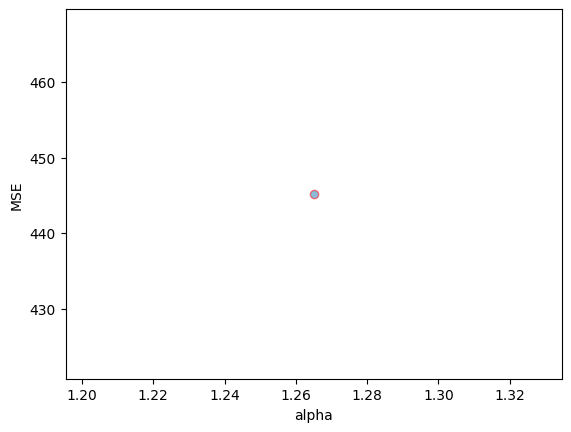

In [42]:
#Par1_degree      = list( range(  2,  7 ) )
Par1_degree      = [ 2 ]
Par2_interaction = [False]
Par3_bias        = [True]

#Par4_alpha = list( np.arange( 1.2, 1.3, 0.005 ) )
Par4_alpha = [ 1.265 ]

#Par4_alpha  = [ 0.002, 0.005, 0.009, 0.01, 0.011, 0.05 ]
#Par4_alpha += list( np.arange( 0.1, 3.1, 0.1 ) )
#Par4_alpha += list( np.arange( 4.0, 10.1, 1.0 ) )

mse_list = list()

# Train
Answer = PolyRidge_Optimization(
    Par1_degree,
    Par2_interaction,
    Par3_bias,
    Par4_alpha
)
# Results:
best_polyridge_model = Answer[0]
best_performance = Answer[1]
best_parameters = Answer[2]
mse_list = Answer[3]

# Show best result:
print("")
print("----- FINAL RESULTS -----")
print( "Parameters = {}".format(best_parameters) )
print("Performance: Degree={}  Alpha={}  R2={:.6f}  MSE={:.6f}  RMSE={:.6f}  MAE={:.6f}  MAPE={:.6f}"
      .format(best_parameters[0], best_parameters[3], best_performance[0], best_performance[1], best_performance[2], 
              best_performance[3], best_performance[4]))

# plot results
#plt.yscale('log')
plt.plot( Par4_alpha, mse_list, color='b' )
plt.xlabel( 'alpha' )
plt.ylabel( 'MSE' )
plt.scatter( Par4_alpha, mse_list, alpha=0.5, edgecolors='r' )

# CONCLUSÃO:
# Degree=2  Alpha=1.265  R2= 0.067701  MSE=445.183613  RMSE=21.099375  MAE=16.739077  MAPE=8.570906
# Degree=3  Alpha=0.008  R2=-0.030329  MSE=491.993849  RMSE=22.180934  MAE=16.981344  MAPE=8.645877
# Degree=4  Alpha=0.009  R2=-0.598353  MSE=763.232188  RMSE=27.626657  MAE=18.378642  MAPE=8.449890

### 9.3. FIT Again for X_TRAIN + X_VAL

In [43]:
# Training:

poly = pp.PolynomialFeatures(
            degree=best_parameters[0],
            interaction_only=best_parameters[1],
            include_bias=best_parameters[2]
)
X_poly_train = poly.fit_transform( np.concatenate( (df_X_train, df_X_val) ) )
best_polyridge_model.fit(
    X_poly_train,
    np.concatenate( (df_y_train, df_y_val) )
)

Ridge(alpha=1.265)

### 9.4. Final Performance (TVT)

##### 9.4.1. X_Train

In [44]:
poly = pp.PolynomialFeatures(
            degree=best_parameters[0],
            interaction_only=best_parameters[1],
            include_bias=best_parameters[2]
)

X_poly_train = poly.fit_transform( df_X_train.to_numpy() )
yhat_train = best_polyridge_model.predict( X_poly_train )
indicator = ShowMyPerformance( df_y_train.to_numpy(), yhat_train )

REGRESSION PERFORMANCE: R2=0.090951  MSE=434.536938  RMSE=20.845550  MAE=16.515510  MAPE=8.400942


##### 9.4.2. X_Val

In [45]:
poly = pp.PolynomialFeatures(
            degree=best_parameters[0],
            interaction_only=best_parameters[1],
            include_bias=best_parameters[2]
)

X_poly_val = poly.fit_transform( df_X_val.to_numpy() )
yhat_val = best_polyridge_model.predict( X_poly_val )
indicator = ShowMyPerformance( df_y_val.to_numpy(), yhat_val )

REGRESSION PERFORMANCE: R2=0.080293  MSE=439.170675  RMSE=20.956399  MAE=16.624197  MAPE=8.526282


##### 9.4.3. X_Test

In [46]:
poly = pp.PolynomialFeatures(
            degree=best_parameters[0],
            interaction_only=best_parameters[1],
            include_bias=best_parameters[2]
)

X_poly_test = poly.fit_transform( df_X_test.to_numpy() )
yhat_test = best_polyridge_model.predict( X_poly_test )
indicator = ShowMyPerformance( df_y_test.to_numpy(), yhat_test )

REGRESSION PERFORMANCE: R2=0.090032  MSE=443.064140  RMSE=21.049089  MAE=16.744215  MAPE=8.312917


## 10. Algorithm: POLINOMIAL REGRESSION ELASTIC NET

### 10.1. Features Selection

In [ ]:
# FEATURES: no feature will be excluded, which means: features = df_X_train
# LABEL = df_y_train

### 10.2. Optimization & Holdout Validation

##### 10.2.1. Optimization Function

In [62]:
def PolyElastic_Optimization(
        inDegree: list,
        inInteractionOnly: list,
        inIncludeBias: list,
        inAlpha: list
) -> list:

    # ACCESSING GLOBALLY:
    # df_X_train, df_y_train,
    # df_X_val, df_y_val,

    TheLength = len(inAlpha) * len(inIncludeBias) * len(inInteractionOnly) * len(inDegree)
    Ratio_list = list()
    mse_list   = list()
    Ratio_local = 0
    mse_local = 0

    inRatio  = [ 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05 ]
    inRatio += list( np.arange( 0.1, 0.91, 0.1 ) )
    inRatio += [ 1-0.0001, 1-0.0005, 1-0.001, 1-0.005, 1-0.01, 1-0.05 ]

    FirstTime = True

    for i in range(len( inDegree )):
        #print("--> i={} - Degree {}".format( i, inDegree[i] ))
        for j in range(len( inInteractionOnly )):
            for k in range(len( inIncludeBias )):
                for l in range(len( inAlpha )):
                    print("--> i={} - Degree={}  Alpha={}".format( i, inDegree[i], inAlpha[l] ))
                    FirstRatio = True
                    for m in range(len( inRatio )):
                        # parameters
                        parameters = [ inDegree[i], inInteractionOnly[j], 
                                    inIncludeBias[k], inAlpha[l], inRatio[m] ]
                        # definition
                        poly = pp.PolynomialFeatures(
                                    degree=inDegree[i],
                                    interaction_only=inInteractionOnly[j],
                                    include_bias=inIncludeBias[k]
                        )
                        X_poly_train = poly.fit_transform( df_X_train.to_numpy() )
                        X_poly_val   = poly.fit_transform( df_X_val.to_numpy() )

                        # training: Elasticnet = L1 + L2
                        model = lm.ElasticNet( alpha=inAlpha[l], l1_ratio=inRatio[m] )
                        model.fit( X_poly_train, df_y_train.to_numpy() )

                        # performance
                        yhat_val = model.predict( X_poly_val )
                        performance = ShowMyPerformance( df_y_val.to_numpy(), yhat_val, True )
                        #mse_list.append( performance[1] )

                        # Is this case the best for this ALPHA?
                        if FirstRatio or performance[1] < best_local_performance[1]:
                            FirstRatio = False
                            best_local_performance = performance
                            Ratio_local = inRatio[m]
                            mse_local   = performance[1]

                        # Is this a best case? (testing MSE)
                        if FirstTime or performance[1] < best_performance[1]:
                            FirstTime = False
                            best_performance = performance
                            best_polyelastic_model = model
                            best_parameters = parameters
                            print("--> PARAMETERS = {}".format( best_parameters ))
                            ShowMyPerformance( df_y_val.to_numpy(), yhat_val )
                    # save local result
                    mse_list.append(mse_local)
                    Ratio_list.append(Ratio_local)

    return [ best_polyelastic_model, best_performance, best_parameters, mse_list, Ratio_list ]

##### 10.2.2. Optimization

--> i=0 - Degree=2  Alpha=0.01
--> PARAMETERS = [2, False, True, 0.01, 0.0001]
REGRESSION PERFORMANCE: R2=0.063507  MSE=447.186066  RMSE=21.146774  MAE=17.889616  MAPE=8.708621
--> PARAMETERS = [2, False, True, 0.01, 0.0005]
REGRESSION PERFORMANCE: R2=0.063508  MSE=447.185656  RMSE=21.146765  MAE=17.889638  MAPE=8.708621
--> PARAMETERS = [2, False, True, 0.01, 0.001]
REGRESSION PERFORMANCE: R2=0.063509  MSE=447.185143  RMSE=21.146753  MAE=17.889665  MAPE=8.708622
--> PARAMETERS = [2, False, True, 0.01, 0.005]
REGRESSION PERFORMANCE: R2=0.063518  MSE=447.181029  RMSE=21.146655  MAE=17.889879  MAPE=8.708625
--> PARAMETERS = [2, False, True, 0.01, 0.01]
REGRESSION PERFORMANCE: R2=0.063529  MSE=447.175865  RMSE=21.146533  MAE=17.890149  MAPE=8.708629
--> PARAMETERS = [2, False, True, 0.01, 0.05]
REGRESSION PERFORMANCE: R2=0.063616  MSE=447.134014  RMSE=21.145544  MAE=17.892333  MAPE=8.708655
--> PARAMETERS = [2, False, True, 0.01, 0.1]
REGRESSION PERFORMANCE: R2=0.063731  MSE=447.079266  R

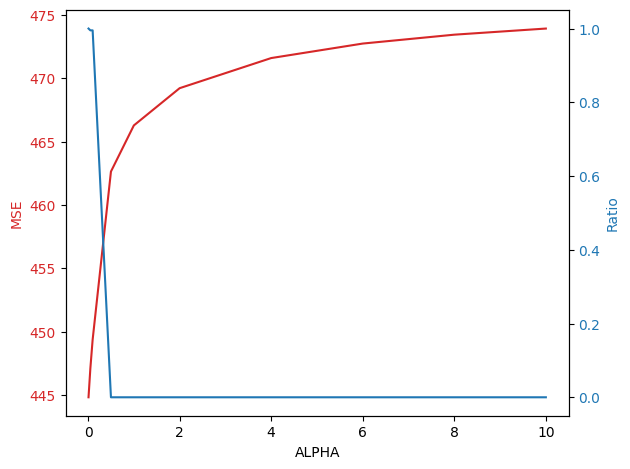

In [63]:
Par1_degree = [ 2 ]
Par2_interaction = [ False ]
Par3_bias = [ True ]
Par4_alpha = [ 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 4.0, 6.0, 8.0, 10.0  ]

# Train
Answer = PolyElastic_Optimization( 
            Par1_degree,
            Par2_interaction,
            Par3_bias,
            Par4_alpha
            )

# Results:
best_polyelastic_model = Answer[0]
best_performance = Answer[1]
best_parameters = Answer[2]
mse_list = Answer[3]
ratio_list = Answer[4]

# Show best result:
print("")
print("----- FINAL RESULTS -----")
print("Parameters = {}".format( best_parameters ))
print("Performance: Degree={}  Alpha={}  Ratio={}  R2={:.6f}  MSE={:.6f}  RMSE={:.6f}  MAE={:.6f}  MAPE={:.6f}"
      .format(best_parameters[0], best_parameters[3], best_parameters[4], best_performance[0], best_performance[1], 
              best_performance[2], best_performance[3], best_performance[4]))

# plot results
# REF: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('ALPHA')
ax1.set_ylabel('MSE', color=color)
ax1.plot(Par4_alpha, mse_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Ratio', color=color)
ax2.plot(Par4_alpha, ratio_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

# CONCLUSION:
# Parameters = [2, False, True, 0.01, 0.9999]
# Degree=2  Alpha=0.01  Ratio=0.9999  R2=0.068470  MSE=444.816186  RMSE=21.090666  MAE=18.022181  MAPE=8.706357


### 10.3. FIT Again for X_TRAIN + X_VAL

In [65]:
# Training:

poly = pp.PolynomialFeatures(
            degree=best_parameters[0],
            interaction_only=best_parameters[1],
            include_bias=best_parameters[2]
)
X_poly_train = poly.fit_transform( np.concatenate( (df_X_train, df_X_val) ) )
best_polyelastic_model.fit(
    X_poly_train,
    np.concatenate( (df_y_train, df_y_val) )
)

ElasticNet(alpha=0.01, l1_ratio=0.9999)

### 10.4. Final Performance (TVT)

##### 10.4.1. X_Train

In [66]:
poly = pp.PolynomialFeatures(
            degree=best_parameters[0],
            interaction_only=best_parameters[1],
            include_bias=best_parameters[2]
)

X_poly_train = poly.fit_transform( df_X_train.to_numpy() )
yhat_train = best_polyelastic_model.predict( X_poly_train )
indicator = ShowMyPerformance( df_y_train.to_numpy(), yhat_train )

REGRESSION PERFORMANCE: R2=0.084902  MSE=437.428524  RMSE=20.914792  MAE=18.015711  MAPE=8.749593


##### 10.4.2. X_Val

In [67]:
poly = pp.PolynomialFeatures(
            degree=best_parameters[0],
            interaction_only=best_parameters[1],
            include_bias=best_parameters[2]
)

X_poly_val = poly.fit_transform( df_X_val.to_numpy() )
yhat_val = best_polyelastic_model.predict( X_poly_val )
indicator = ShowMyPerformance( df_y_val.to_numpy(), yhat_val )

REGRESSION PERFORMANCE: R2=0.075745  MSE=441.342720  RMSE=21.008158  MAE=17.991595  MAPE=8.699839


##### 10.4.3. X_Test

In [68]:
poly = pp.PolynomialFeatures(
            degree=best_parameters[0],
            interaction_only=best_parameters[1],
            include_bias=best_parameters[2]
)

X_poly_test = poly.fit_transform( df_X_test.to_numpy() )
yhat_test = best_polyelastic_model.predict( X_poly_test )
indicator = ShowMyPerformance( df_y_test.to_numpy(), yhat_test )

REGRESSION PERFORMANCE: R2=0.085370  MSE=445.334408  RMSE=21.102948  MAE=18.192837  MAPE=8.738998


## FIM